# Numerical Derivatives Group Project 
#### Corey Dobbs and Emma Rasmussen 

## Problem 1- Finite Differences

In [25]:
# import numpy as np 

# # Define y = sin(x)
# def y(x):
#     y = np.sin(x)
    
#     return y

# # Define derivative function
# def Der(fun, x, h):
#     deriv = (fun(x+h) - fun(x -h))/(2*h)

#     return deriv 

In [26]:
# !pip install autograd

In [27]:
# import numpy as np 

# # Define y = sin(x)
# def y(x):
#     y = anp.sin(x)
    
#     return y

# import matplotlib.pyplot as plt
# import autograd.numpy as anp
# from autograd import grad

# def dual(fun, interval, N=100):
#     x = np.linspace(interval[0], interval[1], 100)
#     deriv  = grad(fun) # Obtain gradient function
#     plt.plot(x, list(map(deriv, x)))
#     plt.show()

# dual(y, [-np.pi, np.pi], 100) #test


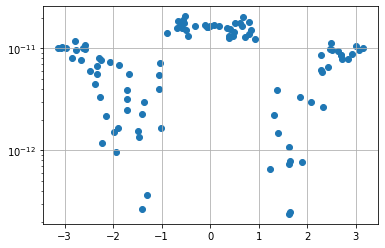

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random
h = 0.00001

random_x = [random.uniform(-np.pi, np.pi) for _ in range(100)]
all_errors = []
for x in random_x:
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    all_errors.append( error )

plt.scatter(random_x,all_errors)
plt.yscale('log')
plt.grid()
plt.show()


Now, to optimize h, we will just test out a bunch of h's and see which one seems optimal.

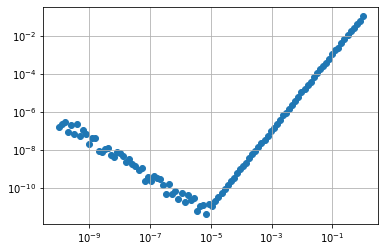

In [29]:
h_vals = np.logspace(-10, 0, num=100)
all_errors = []

for h in h_vals:
    x = np.array([random.uniform(-np.pi, np.pi) for _ in range(100)])
    approx = (np.sin( x + h ) - np.sin( x - h )) / (2 * h)
    error = np.abs(approx - np.cos( x ))
    meanerr = np.mean(error)
    all_errors.append( meanerr )

plt.scatter(h_vals,all_errors)
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.show()

By looking at the graph, we can see that the error seems to level off at about h = 10^5, so we can estimate an optimal h value of about h = .00001. This h value has already been inserted into the error plot above, and one can see that the magnitude of the error doesn't get much above a magnitude of 10^(-7)

In [ ]:
!pip install git+https://github.com/chebpy/chebpy.git
!pip install autograd

The total time it took was 0.15642809867858887
The derivative graph is below: <function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x0000017FFE08EA60>


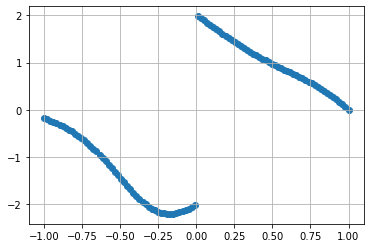

In [21]:
#Everything in one big one

import numpy as np
import matplotlib.pyplot as plt
import chebpy as cheb
import autograd.numpy as anp
from autograd import grad
import time

# Define all the functions
def func1(x):
    return anp.sin(x)

def func2(x):
    return anp.sin(1/x)

def func3(x):
    return 3*x**2 + 1/anp.pi**2*np.log((anp.pi-x)**2) + 1

def func4(x):
    for _ in range(100):
        x = anp.sin(x)
    return x

# def func5(x):
#     A = anp.array([[1,x],[2,x**2]])
#     b = anp.array([1,1])
#     y = anp.linalg.solve(A,b)
#     return 1/anp.abs(y)

def func5(x):
    A = anp.array([[1,x],[2,x**2]])
    b = anp.array([1,1])
    y = anp.linalg.solve(A,b)
    normy = anp.linalg.norm(y)
    return 1/normy

# Create the methods functions
def chebyshev( function, interval, N=100 ):
    f = cheb.chebfun( function, interval, n=N )
    derivative = f.diff()
    derivative.plot()
    plt.grid()
    return derivative

def dual(fun, interval, N=100):
    x = np.linspace(interval[0], interval[1], N)
    deriv  = grad(fun) # Obtain gradient function
    #print(deriv(0.5))
    plt.scatter(x, list(map(deriv, x)))
    plt.grid()
    return deriv

# Create the driver funciton
def driver( method, function, interval, N=100 ):
    if method=='chebyshev':
        start = time.time()
        derivative = chebyshev( function, interval, N )
        end = time.time()
    elif method=='dual':
        start = time.time()
        derivative = dual( function, interval, N )
        end = time.time()
    else:
        print('Please choose a method \'chebyshev\' or \'dual\'')
    total_time = end - start
    print(f'The total time it took was {total_time}')
    print(f'The derivative graph is below: {derivative}')
    # return derivative, total_time

driver('dual', func5, [-1,1], 100)
# x = np.linspace(-1, 1, 100)
# plt.plot(x,[func5(v) for v in x])